In [1]:
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##  连接数据库
# 声明一个变量
db_info = {
    "host":"192.168.1.80", # 我们要连接的数据库的IP地址或者是域名，如果是本地的话可以写localhost或者是127.0.0.1
    "user":"admin", # 我们连接数据库的用户名
    "password":"123", # 我们连接数据库的密码
    "database":"management_systems", # 我们要连接的数据库的名字
    "charset":"utf8" # 这是字符集
}

# 开始连接
conn = pymysql.connect(**db_info)

# cursor是执行sql语句的对象
cursor = conn.cursor()

In [4]:
sql = "select * from customer"
data = pd.read_sql(sql,conn)
data.head()

,id,user_id,order_dt,order_amount,order_money
0,1,vs30033073,2020-01-17,1,20
1,2,vs30026748,2019-12-04,1,20
2,3,vs10000716,2019-07-05,1,20
3,4,vs30032785,2019-08-21,2,0
4,5,vs10000716,2019-10-24,1,20


In [5]:
## 重新设置索引
data = data.set_index('id')
data.head()

,user_id,order_dt,order_amount,order_money
id,,,,
1,vs30033073,2020-01-17,1,20
2,vs30026748,2019-12-04,1,20
3,vs10000716,2019-07-05,1,20
4,vs30032785,2019-08-21,2,0
5,vs10000716,2019-10-24,1,20


In [6]:
## 修改列名
data.columns = ['用户id','订单时间','订单数量','订单金额']
data.head()

,用户id,订单时间,订单数量,订单金额
id,,,,
1,vs30033073,2020-01-17,1,20
2,vs30026748,2019-12-04,1,20
3,vs10000716,2019-07-05,1,20
4,vs30032785,2019-08-21,2,0
5,vs10000716,2019-10-24,1,20


In [7]:
data.describe()

,用户id,订单时间,订单数量,订单金额
count,2013,2013,2013,2013
unique,247,903,10,55
top,vs30029475,2019-07-19,1,20
freq,222,17,1364,1343


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 1 to 2013
Data columns (total 4 columns):
用户id    2013 non-null object
订单时间    2013 non-null object
订单数量    2013 non-null object
订单金额    2013 non-null object
dtypes: object(4)
memory usage: 78.6+ KB


In [9]:
## 修改字段属性
data['订单时间']=data['订单时间'].astype('datetime64')
data['订单数量']=data['订单数量'].astype(int)
data['订单金额']=data['订单金额'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 1 to 2013
Data columns (total 4 columns):
用户id    2013 non-null object
订单时间    2013 non-null datetime64[ns]
订单数量    2013 non-null int64
订单金额    2013 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 78.6+ KB


In [10]:
data.describe()

,订单数量,订单金额
count,2013.000000,2013.000000
mean,1.468952,22.895181
std,0.907038,94.936860
min,1.000000,0.000000
25%,1.000000,20.000000
50%,1.000000,20.000000
75%,2.000000,20.000000
max,12.000000,2650.000000


In [11]:
user_group = data.groupby('用户id').sum()
user_group

,订单数量,订单金额
用户id,,
vs10000005,9,189
vs10000621,214,5704
vs10000627,2,0
vs10000716,250,2616
vs10000743,1,20
...,...,...
vs30033640,3,0
vs30033645,2,0
vs30033648,1,40


In [12]:
data.head()

,用户id,订单时间,订单数量,订单金额
id,,,,
1,vs30033073,2020-01-17,1,20
2,vs30026748,2019-12-04,1,20
3,vs10000716,2019-07-05,1,20
4,vs30032785,2019-08-21,2,0
5,vs10000716,2019-10-24,1,20


In [13]:
## 后边我们将会按照月份来统计数据，那么现在我们需要做的就是加一个列，就是月份
data['月份']=data['订单时间'].dt.month
data.head()

,用户id,订单时间,订单数量,订单金额,月份
id,,,,,
1,vs30033073,2020-01-17,1,20,1
2,vs30026748,2019-12-04,1,20,12
3,vs10000716,2019-07-05,1,20,7
4,vs30032785,2019-08-21,2,0,8
5,vs10000716,2019-10-24,1,20,10


In [14]:
font = {
    'family':'SimHei','size':20
}
plt.rc('font',**font)


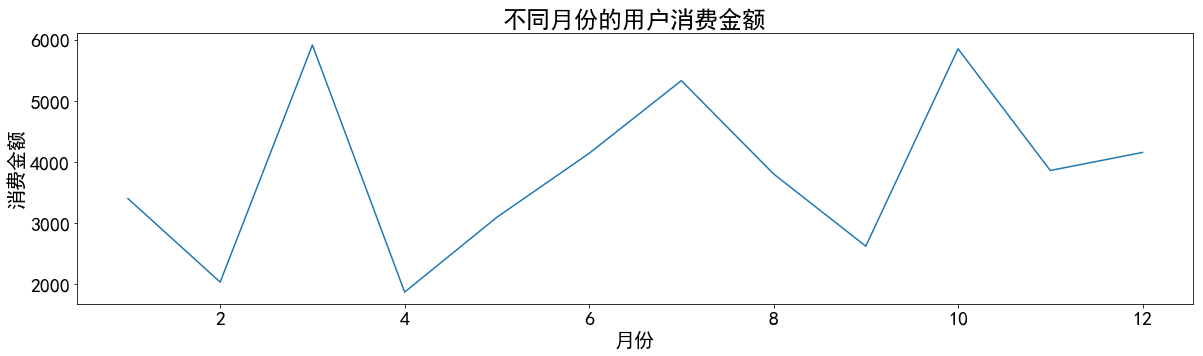

In [15]:
## 不同月份的用户消费金额
plt.figure(figsize=(20,5))
plt.plot(data.groupby('月份')['订单金额'].sum())
plt.xlabel('月份')
plt.ylabel('消费金额')
plt.title('不同月份的用户消费金额')
plt.show()

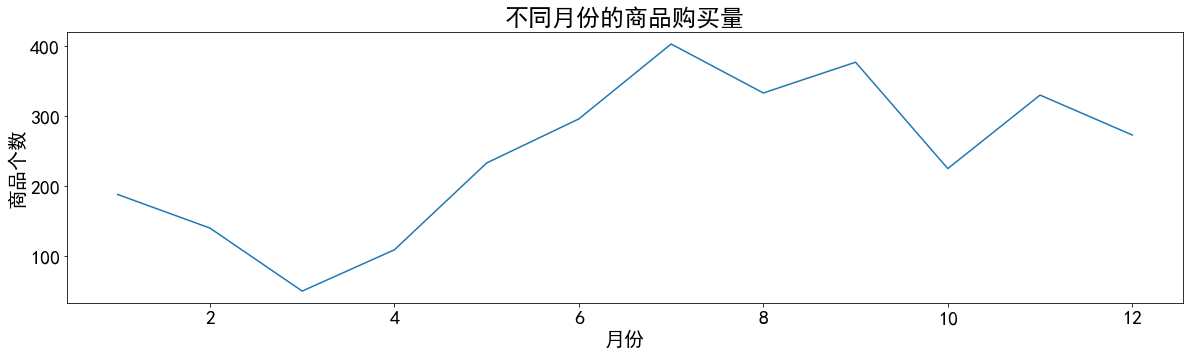

In [16]:
## 不用月份的商品购买量
d = data.groupby('月份')['订单数量'].sum()
plt.figure(figsize=(20,5))
plt.plot(d)
plt.xlabel('月份')
plt.ylabel('商品个数')
plt.title('不同月份的商品购买量')
plt.show()

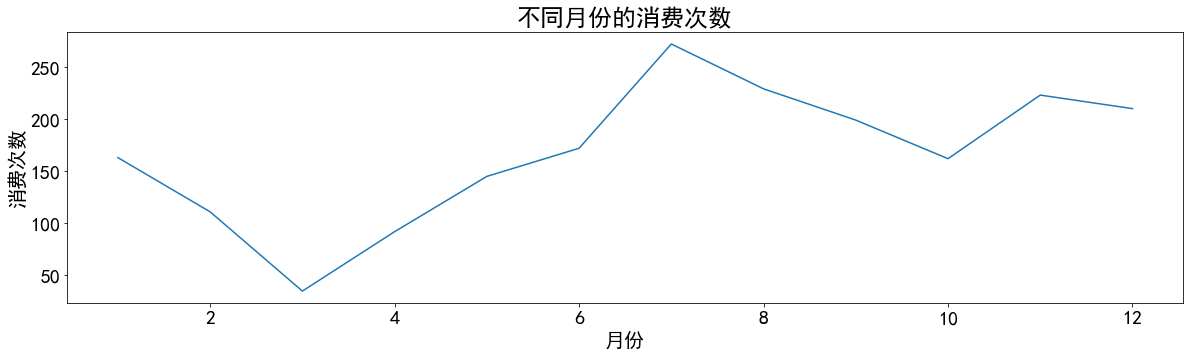

In [18]:
## 不同月份的消费次数
d = data.groupby('月份')['用户id'].count()
plt.figure(figsize=(20,5))
plt.plot(d)
plt.xlabel('月份')
plt.ylabel('消费次数')
plt.title('不同月份的消费次数')
plt.show()

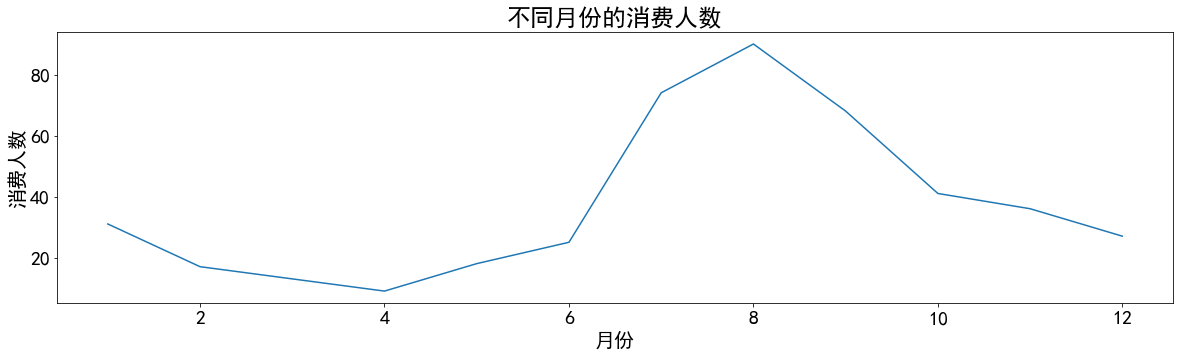

In [19]:
## 不同月份的消费人数
d = data.groupby('月份')['用户id'].nunique()
plt.figure(figsize=(20,5))
plt.plot(d)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('不同月份的消费人数')
plt.show()

## 个体行为分析

In [20]:
data.groupby('用户id').sum().head()

,订单数量,订单金额,月份
用户id,,,
vs10000005,9,189,33
vs10000621,214,5704,1144
vs10000627,2,0,14
vs10000716,250,2616,1118
vs10000743,1,20,3


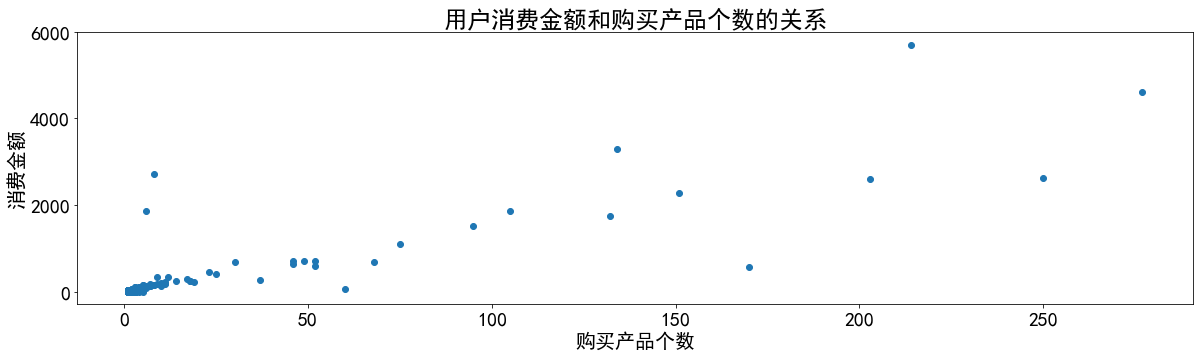

In [21]:
## 用户消费金额和购买产品个数的关系
plt.figure(figsize=(20,5))
user_consumer = data.groupby('用户id').sum()
plt.scatter(user_consumer['订单数量'],user_consumer['订单金额'])
plt.xlabel('购买产品个数')
plt.ylabel('消费金额')
plt.title('用户消费金额和购买产品个数的关系')
plt.show()

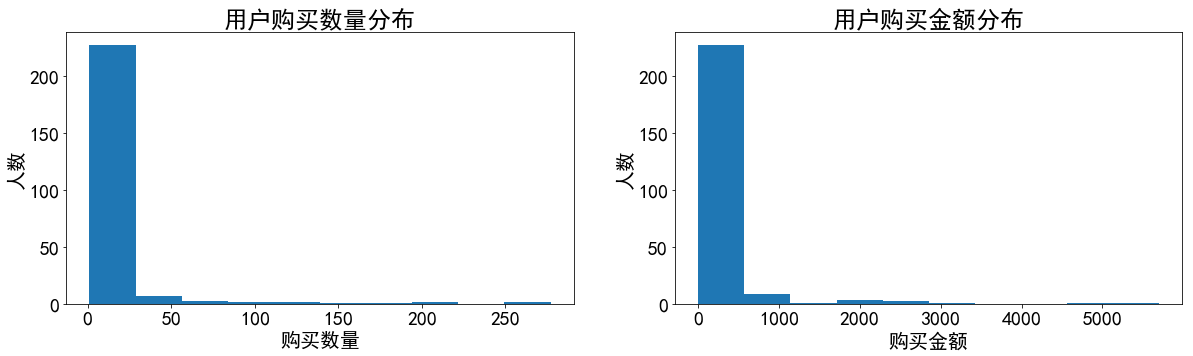

In [22]:
consumer_products = user_consumer['订单数量']
consumer_amount = user_consumer['订单金额']
fig = plt.figure(figsize=(20,5))
fig.add_subplot(121)
plt.hist(consumer_products)
plt.title('用户购买数量分布')
plt.xlabel('购买数量')
plt.ylabel('人数')

fig.add_subplot(122)
plt.hist(consumer_amount)
plt.title('用户购买金额分布')
plt.xlabel('购买金额')
plt.ylabel('人数')
plt.show()



In [26]:
data.groupby('用户id')['月份'].min().value_counts()

8     62
7     48
9     42
1     31
10    19
11    13
6      9
2      7
3      6
5      5
12     4
4      1
Name: 月份, dtype: int64

In [27]:
## 第一次消费人数和时间

d = data.groupby('用户id')['月份'].min().value_counts()
d.sort_index(inplace=True)
d

1     31
2      7
3      6
4      1
5      5
6      9
7     48
8     62
9     42
10    19
11    13
12     4
Name: 月份, dtype: int64

<Figure size 1440x360 with 0 Axes>

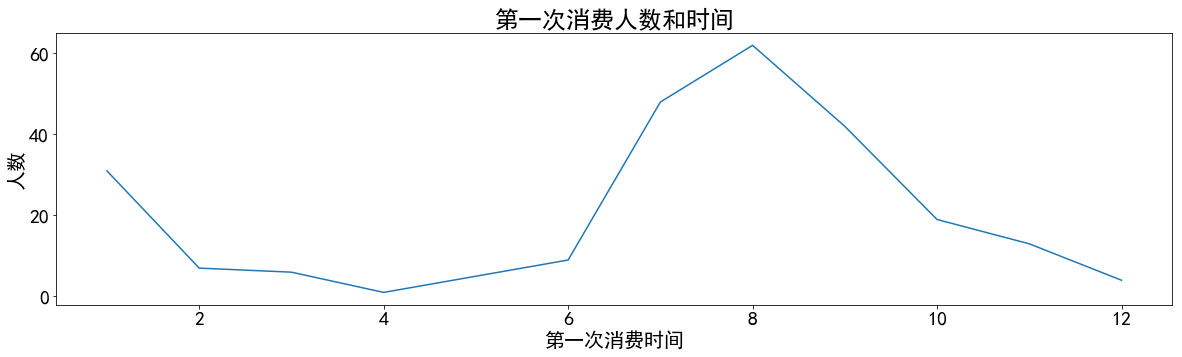

In [29]:
plt.figure(figsize=(20,5))
plt.plot(d)
plt.title('第一次消费人数和时间')
plt.xlabel('第一次消费时间')
plt.ylabel('人数')
plt.show()

In [30]:
## 复购和回购

In [31]:
## 统计用户消费次数
pivoted_counts = data.pivot_table(index='用户id',columns='月份',values='订单时间',aggfunc='count').fillna(0)
pivoted_counts

月份,1,2,3,4,5,6,7,8,9,10,11,12
用户id,,,,,,,,,,,,
vs10000005,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
vs10000621,16.0,10.0,6.0,17.0,19.0,20.0,17.0,5.0,2.0,18.0,18.0,21.0
vs10000627,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
vs10000716,12.0,5.0,0.0,0.0,0.0,0.0,14.0,19.0,24.0,12.0,30.0,15.0
vs10000743,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
vs30033640,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vs30033645,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
vs30033648,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# 确定用户是否有回购的行为 
pivoted_counts.transf = pivoted_counts.applymap(lambda x: 1 if x >1 else np.NaN if x==0 else 0)
pivoted_counts.transf.head()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


月份,1,2,3,4,5,6,7,8,9,10,11,12
用户id,,,,,,,,,,,,
vs10000005,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
vs10000621,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
vs10000627,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
vs10000716,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0
vs10000743,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


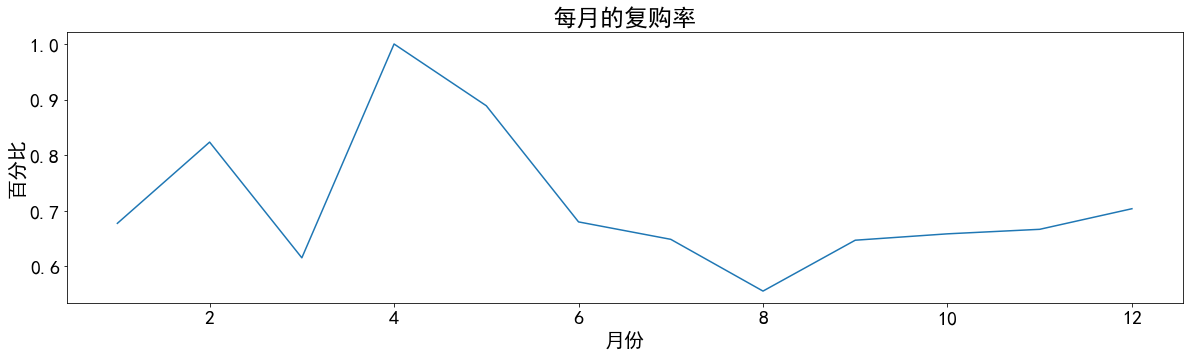

In [34]:
## 每个月的复购率
plt.figure(figsize=(20,5))
month_counts_reorder_rate = pivoted_counts.transf.sum()/pivoted_counts.transf.count()
plt.plot(month_counts_reorder_rate)
plt.title('每月的复购率')
plt.xlabel('月份')
plt.ylabel('百分比')
plt.show()

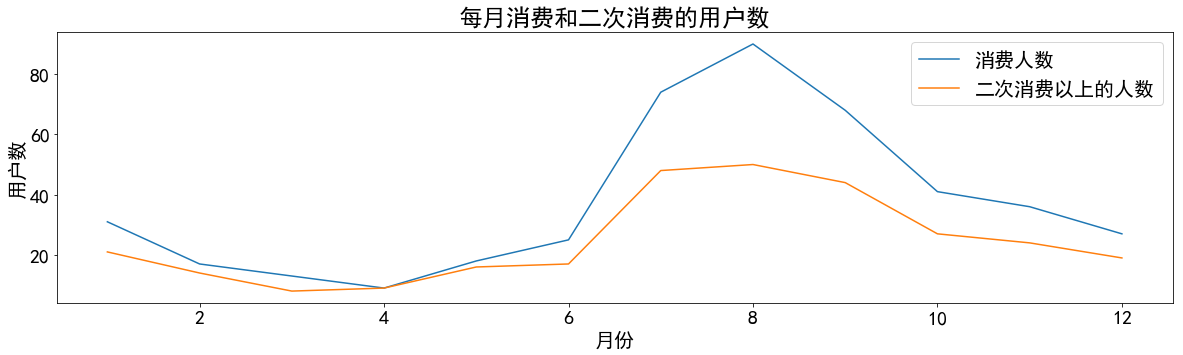

In [35]:
# 每月消费和二次消费的用户数
a,b = plt.subplots(figsize=(20,5))
b.plot(pivoted_counts.transf.count())
b.plot(pivoted_counts.transf.sum())
b.legend(['消费人数','二次消费以上的人数'])

plt.title('每月消费和二次消费的用户数')
plt.xlabel('月份')
plt.ylabel('用户数')
plt.show()

## FRM
- R:最近一次消费
- F:消费频率
- M:消费金额

In [37]:
user_rfm = data.pivot_table(index='用户id',values=['订单时间','订单数量','订单金额'],
                           aggfunc={'订单时间':'max','订单数量':"count",'订单金额':"sum"})
user_rfm.head()

,订单数量,订单时间,订单金额
用户id,,,
vs10000005,6,2019-12-27 14:42:48,189
vs10000621,169,2020-02-28 00:00:00,5704
vs10000627,2,2019-07-23 00:00:00,0
vs10000716,131,2020-02-28 00:00:00,2616
vs10000743,1,2019-03-15 00:00:00,20


In [38]:
# R:最近一次消费,我们现在假设时间是2021-1-1
user_rfm['最近一次消费']=(pd.to_datetime('2021-01-01 00:00:00')-user_rfm['订单时间'])/np.timedelta64(1,"D")
user_rfm['最近一次消费']

用户id
vs10000005    370.386944
vs10000621    308.000000
vs10000627    528.000000
vs10000716    308.000000
vs10000743    658.000000
                 ...    
vs30033640    344.664410
vs30033645    344.307813
vs30033648    343.547280
vs30033726    325.000000
vs30033728    321.348137
Name: 最近一次消费, Length: 247, dtype: float64

In [39]:
user_rfm = user_rfm.rename(columns={'最近一次消费':"R",'订单数量':"F",'订单金额':"M"})
user_rfm

,F,订单时间,M,R
用户id,,,,
vs10000005,6,2019-12-27 14:42:48,189,370.386944
vs10000621,169,2020-02-28 00:00:00,5704,308.000000
vs10000627,2,2019-07-23 00:00:00,0,528.000000
vs10000716,131,2020-02-28 00:00:00,2616,308.000000
vs10000743,1,2019-03-15 00:00:00,20,658.000000
...,...,...,...,...
vs30033640,3,2020-01-22 08:03:15,0,344.664410
vs30033645,1,2020-01-22 16:36:45,0,344.307813
vs30033648,1,2020-01-23 10:51:55,40,343.547280


In [41]:
## 给用户贴上标签

def rfm_func(x):
    level = x.apply(lambda x:"1" if x>=0 else "0")
    label = level.R + level.F + level.M
    d = {
        "111":'高价值用户',
        '011':'重点保持客户',
        '101':'重点发展客户',
        '001':'重点挽留客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般发展客户',
        '000':'潜在客户' 
    }
    
    result = d[label]
    return result
user_rfm['label']=user_rfm[['R','F','M']].apply(lambda x : x-x.mean()).apply(rfm_func,axis=1)
user_rfm.head(10)

,F,订单时间,M,R,label
用户id,,,,,
vs10000005,6,2019-12-27 14:42:48,189,370.386944,重点挽留客户
vs10000621,169,2020-02-28 00:00:00,5704,308.000000,重点保持客户
vs10000627,2,2019-07-23 00:00:00,0,528.000000,一般发展客户
vs10000716,131,2020-02-28 00:00:00,2616,308.000000,重点保持客户
vs10000743,1,2019-03-15 00:00:00,20,658.000000,一般发展客户
vs10000757,53,2020-02-11 14:26:58,1104,324.397940,重点保持客户
vs10000773,23,2020-01-14 00:00:00,460,353.000000,重点保持客户
vs10000775,3,2019-11-18 00:00:00,2730,410.000000,重点挽留客户
vs10000788,4,2019-08-09 14:01:34,144,510.415579,一般发展客户


In [42]:
## 我们来观察一下每一个级别的用户的数量
user_rfm.groupby('label').count()

,F,订单时间,M,R
label,,,,
一般保持客户,3,3,3,3
一般发展客户,144,144,144,144
潜在客户,65,65,65,65
重点保持客户,24,24,24,24
重点发展客户,2,2,2,2
重点挽留客户,2,2,2,2
高价值用户,7,7,7,7


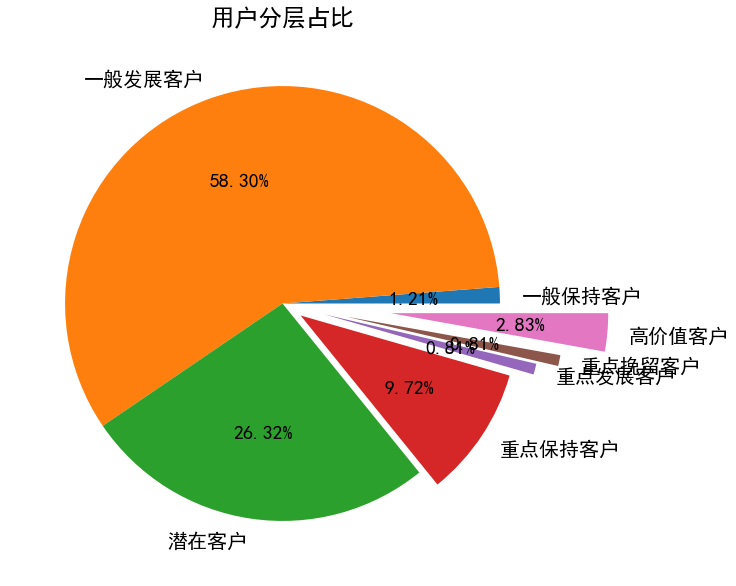

In [43]:
plt.figure(figsize=(20,10))
plt.pie(user_rfm.groupby('label').count()['F']
       ,labels=['一般保持客户','一般发展客户','潜在客户','重点保持客户','重点发展客户','重点挽留客户','高价值客户']
       ,autopct='%.2f%%'
        ,explode=(0,0,0,0.1,0.2,0.3,0.5)
       )

plt.title('用户分层占比')
plt.show()